In [4]:
# Pagamento mediante a esforço de cobrança
import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [5]:
import scorecardpy as sc

In [6]:
fonte = 'https://raw.githubusercontent.com/Diego-Sarti-19/SSarti_Dados_GIT/main/Cred_Varejo.CSV?raw=true'

In [7]:
data_set = pd.read_csv(fonte, sep =';')

In [9]:
data_set.head(3)

,id,pagamento,estadocivil,idade,sexo
0,85,1,0,20,0
1,86,1,0,34,1
2,87,1,0,21,1


In [12]:
bins = sc.woebin(data_set[['pagamento','estadocivil', 'idade', 'sexo']],'pagamento')

[INFO] creating woe binning ...


In [13]:
y = data_set['pagamento']
x = data_set[['estadocivil', 'idade', 'sexo']]

In [14]:
# acrescenta intercepto
x = sm.add_constant(x)
sm_model = sm.Logit(y, x).fit(disp=0)


In [15]:
# visualizando p_valor
print(sm_model.pvalues)

const          7.992960e-02
estadocivil    4.142547e-07
idade          8.773147e-03
sexo           3.010056e-03
dtype: float64


In [16]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              pagamento   No. Observations:                  180
Model:                          Logit   Df Residuals:                      176
Method:                           MLE   Df Model:                            3
Date:                Sat, 03 Jun 2023   Pseudo R-squ.:                  0.3106
Time:                        12:02:50   Log-Likelihood:                -73.323
converged:                       True   LL-Null:                       -106.35
Covariance Type:            nonrobust   LLR p-value:                 2.981e-14
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9659      1.123     -1.751      0.080      -4.166       0.234
estadocivil    -2.9509      0.583     -5.062      0.000      -4.093      -1.808
idade           0.1161      0.044      2.621      0.009       0.029       0.203
sexo            1.3012      0.439      2.967      0.003       0.442       2.161
===============================================================================
"""

In [17]:
y_prob = sm_model.predict(x)
# COnvertendo saída para um DataFrrame
y_prob_df =pd.DataFrame(y_prob, columns=['probabilidade_y'])

In [18]:
# Adiciona uma coluna com base em uma sentença condicional
y_prob_df['previsto'] = [1 if probabilidade_y > 0.5 else '0' for probabilidade_y in y_prob_df['probabilidade_y']]
y_predict = y_prob_df['previsto'].astype('int64')

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [20]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        50
           1       0.83      0.96      0.89       130

    accuracy                           0.83       180
   macro avg       0.83      0.72      0.75       180
weighted avg       0.83      0.83      0.81       180



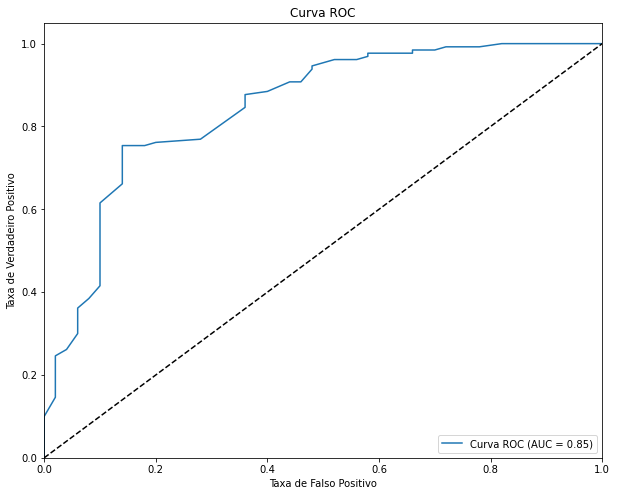

In [21]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [22]:
import pickle

In [23]:
deploy = "C:\\Users\\diego\\OneDrive\\Documentos_OneDrive\\Cod_bibliotecas\\LIT_Analise_Multivariada\\modelo_logit_classic.sav"

In [26]:
# Salvar o modelo
with open(deploy, 'wb') as arquivo:
    pickle.dump(sm_model, arquivo)

In [27]:
# Carregar o modelo
with open(deploy, 'rb') as arquivo:
    sm_model_carregado = pickle.load(arquivo)

In [49]:
novos_valores_x = []

# Valores constantes
primeiro_valor = 1
segundo_valor = 30
terceiro_valor = 0


In [50]:
# Estrutura de repetição
for i in range(4):
    novo_valor_x = [primeiro_valor, segundo_valor + i, terceiro_valor]
    novos_valores_x.append(novo_valor_x)

# Converter para um array numpy
novos_valores_x = np.array(novos_valores_x)

In [51]:
novos_valores_x

array([[ 1, 30,  0],
       [ 1, 31,  0],
       [ 1, 32,  0],
       [ 1, 33,  0]])

In [64]:
novos_valores_x = np.array([[1, 30, 0], [0, 45, 1], [1, 35, 1]])
novos_valores_x = sm.add_constant(novos_valores_x)

In [65]:
novos_valores_x

array([[ 1.,  1., 30.,  0.],
       [ 1.,  0., 45.,  1.],
       [ 1.,  1., 35.,  1.]])

In [56]:
# Fazer as previsões de y
previsoes_y = sm_model.predict(novos_valores_x)

# Exibir as previsões
print(previsoes_y)

[0.19270173 0.98966447 0.6104962 ]


In [42]:
# Criar array com os dois primeiros valores constantes
primeiros_valores = np.array([1, 30])

In [43]:
# Criar array com os terceiros valores crescentes
terceiros_valores = np.arange(0, 1000, 10)

In [66]:
novos_valores_x = []

# Valores constantes
primeiro_valor = 1
segundo_valor = 30
terceiro_valor = 0
quarto_valor = 0

In [67]:
for i in range(4):
    novo_valor_x = [primeiro_valor, segundo_valor + i, terceiro_valor, quarto_valor]
    novos_valores_x.append(novo_valor_x)

In [68]:
novos_valores_x = np.array(novos_valores_x)
novos_valores_x = sm.add_constant(novos_valores_x)

In [69]:
novos_valores_x

array([[ 1, 30,  0,  0],
       [ 1, 31,  0,  0],
       [ 1, 32,  0,  0],
       [ 1, 33,  0,  0]])

In [72]:
previsoes_y = sm_model_carregado.predict(novos_valores_x)


In [73]:
previsoes_y

array([4.99841705e-40, 2.61368353e-41, 1.36670100e-42, 7.14651028e-44])